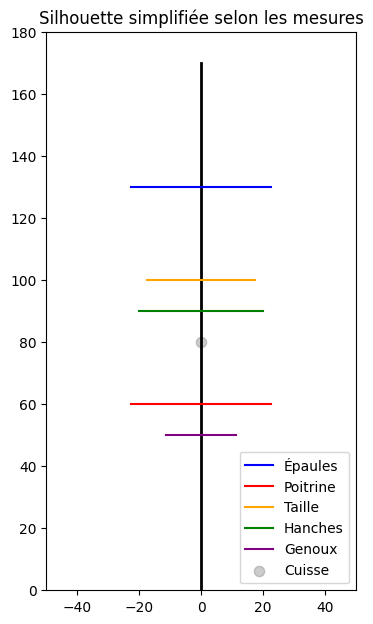

In [7]:
import matplotlib.pyplot as plt

# Exemple de mesures (remplace-les par les tiennes)
mesures = {
    'taille': 170,
    'tour_de_poitrine': 90,
    'hauteur_de_poitrine': 60,
    'hauteur_d_entrejambe': 80,
    'largeur_des_hanches': 40,
    'hauteur_des_hanches': 90,
    'hauteur_des_genoux': 50,
    'largeur_d_epaule': 45,
    'hauteur_des_epaules': 130,
    'tour_de_cuisse': 55,
    'tour_de_taille': 70,
    'hauteur_de_la_taille': 100
}

# Création d'une figure
fig, ax = plt.subplots(figsize=(4, 8))

# Dessin simplifié (vue de face)
# Tronc
ax.plot([0, 0], [0, mesures['taille']], color='black', linewidth=2)

# Épaules
epaule_g = -mesures['largeur_d_epaule']/2
epaule_d = mesures['largeur_d_epaule']/2
ax.plot([epaule_g, epaule_d], [mesures['hauteur_des_epaules']]*2, color='blue', label='Épaules')

# Poitrine
poitrine_g = -mesures['tour_de_poitrine']/4
poitrine_d = mesures['tour_de_poitrine']/4
ax.plot([poitrine_g, poitrine_d], [mesures['hauteur_de_poitrine']]*2, color='red', label='Poitrine')

# Taille
taille_g = -mesures['tour_de_taille']/4
taille_d = mesures['tour_de_taille']/4
ax.plot([taille_g, taille_d], [mesures['hauteur_de_la_taille']]*2, color='orange', label='Taille')

# Hanches
hanche_g = -mesures['largeur_des_hanches']/2
hanche_d = mesures['largeur_des_hanches']/2
ax.plot([hanche_g, hanche_d], [mesures['hauteur_des_hanches']]*2, color='green', label='Hanches')

# Genoux
ax.plot([epaule_g/2, epaule_d/2], [mesures['hauteur_des_genoux']]*2, color='purple', label='Genoux')

# Cuisses (représentées sous forme de points pour indiquer le tour)
ax.scatter(0, mesures['hauteur_d_entrejambe'], s=mesures['tour_de_cuisse'], color='gray', alpha=0.4, label='Cuisse')

# Configuration du graphique
ax.set_xlim(-50, 50)
ax.set_ylim(0, mesures['taille'] + 10)
ax.set_aspect('equal')
ax.set_title("Silhouette simplifiée selon les mesures")
# ax.invert_yaxis()
ax.legend(loc='lower right')

plt.show()

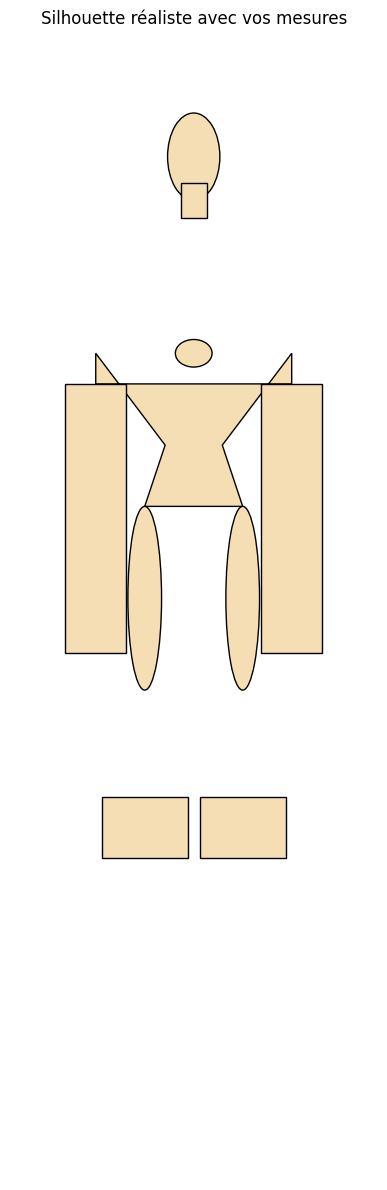

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Rectangle, Polygon

def dessiner_silhouette_realiste(mesures):
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.set_aspect('equal')
    plt.axis('off')
    
    # Convertir toutes les mesures en float pour les calculs
    mesures = {k: float(v) for k, v in mesures.items()}
    
    # Calcul des proportions (approximation)
    hauteur_totale = mesures['hauteur_des_epaules'] + mesures['hauteur_d_entrejambe']
    echelle = hauteur_totale / 170  # Normalisation basée sur 170cm
    
    # Tête
    tete_diam = 22 * echelle
    tete = Ellipse((mesures['largeur_d_epaule']/2, hauteur_totale + tete_diam/2), 
                   width=tete_diam*0.6, height=tete_diam, fc='wheat', ec='black')
    ax.add_patch(tete)
    
    # Cou
    cou = Rectangle((mesures['largeur_d_epaule']/2 - tete_diam*0.15, hauteur_totale - tete_diam*0.2),
                    width=tete_diam*0.3, height=tete_diam*0.4, fc='wheat', ec='black')
    ax.add_patch(cou)
    
    # Épaules et torse
    epaule_gauche = (mesures['largeur_d_epaule']*0.1, hauteur_totale - mesures['hauteur_des_epaules'])
    epaule_droite = (mesures['largeur_d_epaule']*0.9, hauteur_totale - mesures['hauteur_des_epaules'])
    
    # Poitrine
    poitrine_y = hauteur_totale - mesures['hauteur_de_poitrine']
    poitrine = Ellipse((mesures['largeur_d_epaule']/2, poitrine_y),
                      width=mesures['tour_de_poitrine']/15, height=mesures['tour_de_poitrine']/20,
                      fc='wheat', ec='black')
    ax.add_patch(poitrine)
    
    # Taille
    taille_y = hauteur_totale - mesures['hauteur_de_la_taille']
    taille_gauche = (mesures['largeur_d_epaule']/2 - mesures['tour_de_taille']/15, taille_y)
    taille_droite = (mesures['largeur_d_epaule']/2 + mesures['tour_de_taille']/15, taille_y)
    
    # Hanches
    hanches_y = hauteur_totale - mesures['hauteur_des_hanches']
    hanche_gauche = (mesures['largeur_des_hanches']*0.3, hanches_y)
    hanche_droite = (mesures['largeur_des_hanches']*0.7, hanches_y)
    
    # Torse (connecte épaules, taille et hanches)
    torse = Polygon([epaule_gauche, 
                    (epaule_gauche[0], poitrine_y),
                    taille_gauche,
                    hanche_gauche,
                    hanche_droite,
                    taille_droite,
                    (epaule_droite[0], poitrine_y),
                    epaule_droite], 
                   fc='wheat', ec='black')
    ax.add_patch(torse)
    
    # Bras (simplifiés)
    bras_longueur = hauteur_totale * 0.4
    bras_gauche = Rectangle((epaule_gauche[0] - 5, epaule_gauche[1] - bras_longueur),
                           width=10, height=bras_longueur, fc='wheat', ec='black')
    bras_droit = Rectangle((epaule_droite[0] - 5, epaule_droite[1] - bras_longueur),
                          width=10, height=bras_longueur, fc='wheat', ec='black')
    ax.add_patch(bras_gauche)
    ax.add_patch(bras_droit)
    
    # Jambes
    entrejambe_y = hauteur_totale - mesures['hauteur_d_entrejambe']
    genou_y = hauteur_totale - mesures['hauteur_des_genoux']
    
    # Cuisses
    cuisse_gauche = Ellipse((hanche_gauche[0], (hanches_y + entrejambe_y)/2),
                           width=mesures['tour_de_cuisse']/10, height=(hanches_y - entrejambe_y),
                           fc='wheat', ec='black')
    cuisse_droite = Ellipse((hanche_droite[0], (hanches_y + entrejambe_y)/2),
                           width=mesures['tour_de_cuisse']/10, height=(hanches_y - entrejambe_y),
                           fc='wheat', ec='black')
    ax.add_patch(cuisse_gauche)
    ax.add_patch(cuisse_droite)
    
    # Mollets et pieds (simplifiés)
    pied_gauche = Rectangle((hanche_gauche[0] - 7, entrejambe_y - hauteur_totale*0.25),
                          width=14, height=10, fc='wheat', ec='black')
    pied_droit = Rectangle((hanche_droite[0] - 7, entrejambe_y - hauteur_totale*0.25),
                         width=14, height=10, fc='wheat', ec='black')
    ax.add_patch(pied_gauche)
    ax.add_patch(pied_droit)
    
    plt.title('Silhouette réaliste avec vos mesures', pad=20)
    plt.xlim(-10, mesures['largeur_d_epaule'] + 10)
    plt.ylim(-50, hauteur_totale + tete_diam + 10)
    plt.tight_layout()
    plt.show()

# Exemple de mesures (remplacez par vos valeurs)
mesures_exemple = {
    'taille': 170,
    'tour_de_poitrine': 90,
    'hauteur_de_poitrine': 25,
    'hauteur_d_entrejambe': 80,
    'largeur_des_hanches': 40,
    'hauteur_des_hanches': 50,
    'hauteur_des_genoux': 110,
    'largeur_d_epaule': 40,
    'hauteur_des_epaules': 30,
    'tour_de_cuisse': 55,
    'tour_de_taille': 70,
    'hauteur_de_la_taille': 40
}

dessiner_silhouette_realiste(mesures_exemple)

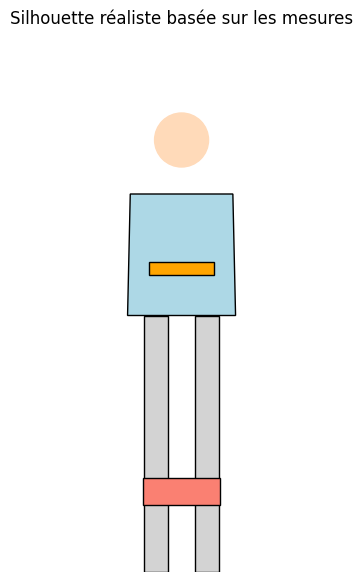

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Mesures (en cm, exemple)
mesures = {
    'taille': 170,
    'tour_de_poitrine': 90,
    'hauteur_de_poitrine': 25,
    'hauteur_d_entrejambe': 80,
    'largeur_des_hanches': 40,
    'hauteur_des_hanches': 95,
    'hauteur_des_genoux': 50,
    'largeur_d_epaule': 38,
    'hauteur_des_epaules': 140,
    'tour_de_cuisse': 55,
    'tour_de_taille': 75,
    'hauteur_de_la_taille': 110,
}

# Fonctions de dessin
def dessiner_silhouette(m):
    fig, ax = plt.subplots(figsize=(3, 8))
    
    # Tronc : épaule à entrejambe
    ax.add_patch(patches.Polygon(
        xy=[
            [150 - m['largeur_d_epaule']/2, m['hauteur_des_epaules']],
            [150 + m['largeur_d_epaule']/2, m['hauteur_des_epaules']],
            [150 + m['largeur_des_hanches']/2, m['hauteur_des_hanches']],
            [150 - m['largeur_des_hanches']/2, m['hauteur_des_hanches']],
        ],
        closed=True, facecolor='lightblue', edgecolor='black'
    ))

    # Tête (optionnelle)
    ax.add_patch(patches.Circle((150, m['hauteur_des_epaules'] + 20), 10, color='peachpuff'))

    # Jambes (de hanches à sol)
    cuisse_largeur = m['tour_de_cuisse'] / 2 / 3.14
    ax.add_patch(patches.Rectangle(
        (150 - cuisse_largeur - 5, 0),
        cuisse_largeur,
        m['hauteur_des_hanches'],
        facecolor='lightgrey', edgecolor='black'
    ))
    ax.add_patch(patches.Rectangle(
        (150 + 5, 0),
        cuisse_largeur,
        m['hauteur_des_hanches'],
        facecolor='lightgrey', edgecolor='black'
    ))

    # Poitrine
    ax.add_patch(patches.Rectangle(
        (150 - m['tour_de_poitrine']/2/3.14, m['hauteur_de_poitrine']),
        m['tour_de_poitrine']/3.14,
        10,
        facecolor='salmon', edgecolor='black'
    ))

    # Taille
    ax.add_patch(patches.Rectangle(
        (150 - m['tour_de_taille']/2/3.14, m['hauteur_de_la_taille']),
        m['tour_de_taille']/3.14,
        5,
        facecolor='orange', edgecolor='black'
    ))

    # Réglages
    ax.set_xlim(100, 200)
    ax.set_ylim(0, m['taille'] + 30)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("Silhouette réaliste basée sur les mesures")
    plt.tight_layout()
    plt.show()

# Dessiner
dessiner_silhouette(mesures)

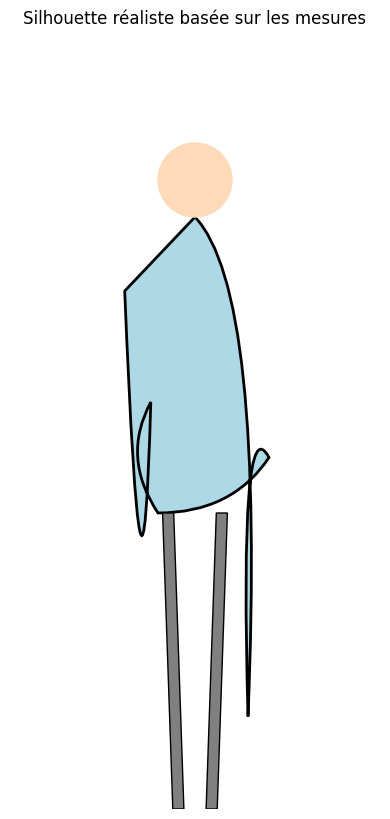

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch, Circle
from matplotlib.path import Path
import numpy as np

# Mesures réalistes en cm
mesures = {
    'taille': 170,
    'tour_de_poitrine': 90,
    'hauteur_de_poitrine': 25,
    'hauteur_d_entrejambe': 80,
    'largeur_des_hanches': 40,
    'hauteur_des_hanches': 95,
    'hauteur_des_genoux': 50,
    'largeur_d_epaule': 38,
    'hauteur_des_epaules': 140,
    'tour_de_cuisse': 55,
    'tour_de_taille': 75,
    'hauteur_de_la_taille': 110,
}

def dessiner_silhouette_realiste(m):
    fig, ax = plt.subplots(figsize=(4, 9))
    
    # Coordonnées du corps avec courbes (Path)
    largeur_poitrine = m['tour_de_poitrine'] / 3.14
    largeur_taille = m['tour_de_taille'] / 3.14
    largeur_hanches = m['largeur_des_hanches']
    
    x_centre = 150
    
    # Points du profil du corps
    verts = [
        (x_centre - m['largeur_d_epaule']/2, m['hauteur_des_epaules']),  # épaule G
        (x_centre - largeur_poitrine/2, m['hauteur_de_poitrine']),       # poitrine G
        (x_centre - largeur_taille/2, m['hauteur_de_la_taille']),        # taille G
        (x_centre - largeur_hanches/2, m['hauteur_des_hanches']),        # hanche G
        (x_centre - 10, m['hauteur_d_entrejambe']),                      # entrejambe G
        (x_centre + 10, m['hauteur_d_entrejambe']),                      # entrejambe D
        (x_centre + largeur_hanches/2, m['hauteur_des_hanches']),        # hanche D
        (x_centre + largeur_taille/2, m['hauteur_de_la_taille']),        # taille D
        (x_centre + largeur_poitrine/2, m['hauteur_de_poitrine']),       # poitrine D
        (x_centre + m['largeur_d_epaule']/2, m['hauteur_des_epaules']),  # épaule D
        (x_centre, m['hauteur_des_epaules'] + 20),                        # cou
        (x_centre - m['largeur_d_epaule']/2, m['hauteur_des_epaules']),  # retour
    ]

    codes = [Path.MOVETO] + [Path.CURVE3]*9 + [Path.LINETO, Path.CLOSEPOLY]
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor='lightblue', lw=2, edgecolor='black')
    ax.add_patch(patch)

    # Tête
    ax.add_patch(Circle((x_centre, m['hauteur_des_epaules'] + 30), 10, color='peachpuff'))

    # Jambes effilées
    largeur_cuisse = m['tour_de_cuisse'] / 3.14 / 2
    cheville = 6
    jambe_gauche = [
        [x_centre - largeur_cuisse, m['hauteur_d_entrejambe']],
        [x_centre - cheville, 0],
        [x_centre - cheville + 3, 0],
        [x_centre - largeur_cuisse + 3, m['hauteur_d_entrejambe']],
    ]
    jambe_droite = [
        [x_centre + largeur_cuisse, m['hauteur_d_entrejambe']],
        [x_centre + cheville, 0],
        [x_centre + cheville - 3, 0],
        [x_centre + largeur_cuisse - 3, m['hauteur_d_entrejambe']],
    ]
    ax.add_patch(plt.Polygon(jambe_gauche, closed=True, facecolor='gray', edgecolor='black'))
    ax.add_patch(plt.Polygon(jambe_droite, closed=True, facecolor='gray', edgecolor='black'))

    # Réglages
    ax.set_xlim(100, 200)
    ax.set_ylim(0, m['taille'] + 40)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("Silhouette réaliste basée sur les mesures")
    plt.tight_layout()
    plt.show()

# Affichage
dessiner_silhouette_realiste(mesures)

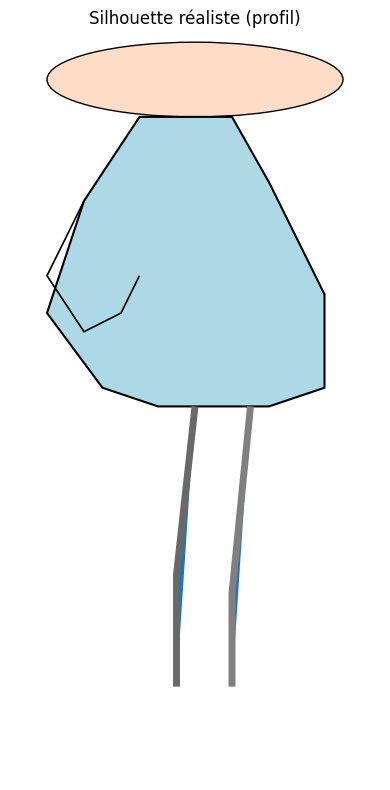

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, PathPatch
from matplotlib.path import Path
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(4, 8))

# --- Tête ---
tete = Ellipse((0.5, 7.5), width=0.8, height=0.8, color='#FEDCC7', ec='black')
ax.add_patch(tete)

# --- Tronc (forme anatomique) ---
tronc_path = Path([
    (0.35, 7.1),     # base du cou (milieu haut)
    (0.2, 6.2),      # épaule avant
    (0.1, 5.0),      # taille (creusé du dos)
    (0.25, 4.2),     # ventre
    (0.4, 4.0),      # base du tronc
    (0.7, 4.0),      # base du tronc (côté ventre)
    (0.85, 4.2),     # ventre avant
    (0.85, 5.2),     # poitrine avant
    (0.7, 6.4),      # poitrine haute
    (0.6, 7.1),      # haut du cou
    (0.35, 7.1)      # retour au départ
], closed=True)

tronc_patch = PathPatch(tronc_path, facecolor='lightblue', lw=1.5)
ax.add_patch(tronc_patch)

# --- Bras droit (vue de profil, en demi-cercle) ---
bras_path = Path([
    (0.2, 6.2),   # épaule
    (0.1, 5.4),   # bras descendu
    (0.2, 4.8),   # coude
    (0.3, 5.0),   # poignet
    (0.35, 5.4),  # main proche ventre
], closed=False)

bras_patch = PathPatch(bras_path, edgecolor='black', facecolor='none', lw=1.2)
ax.add_patch(bras_patch)

# --- Jambes (profil) ---
# Jambe arrière
jambe_arriere = PathPatch(Path([
    (0.5, 4.0),
    (0.45, 2.2),
    (0.45, 1.0)
]), edgecolor='dimgray', lw=5)
ax.add_patch(jambe_arriere)

# Jambe avant
jambe_avant = PathPatch(Path([
    (0.65, 4.0),
    (0.6, 2.0),
    (0.6, 1.0)
]), edgecolor='gray', lw=5)
ax.add_patch(jambe_avant)

# --- Réglages d’affichage ---
ax.set_xlim(0, 1)
ax.set_ylim(0, 8)
ax.axis('off')
plt.title("Silhouette réaliste (profil)")
plt.tight_layout()
plt.show()
